
# Visualizing Two Quantitative Variables
> In this chapter, you will create and customize plots that visualize the relationship between two quantitative variables. To do this, you will use scatter plots and line plots to explore how the level of air pollution in a city changes over the course of a day and how horsepower relates to fuel efficiency in cars. You will also see another big advantage of using Seaborn - the ability to easily create subplots in a single figure! This is the Summary of lecture "Introduction to Data Visualization with Seaborn", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Visualization]
- image: images/mpg_origin.png

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

## Introduction to relational plots and subplots
- Relational plots
    - Height vs. Weight
    - Number of school absences vs. final grade
    - GDP vs. percentile literate

### Creating subplots with col and row
We've seen in prior exercises that students with more absences (`"absences"`) tend to have lower final grades (`"G3"`). Does this relationship hold regardless of how much time students study each week?

To answer this, we'll look at the relationship between the number of absences that a student has in school and their final grade in the course, creating separate subplots based on each student's weekly study time (`"study_time"`).

In [2]:
student_data = pd.read_csv('./dataset/student-alcohol-consumption.csv', index_col=0)
student_data.head()

school sex  age famsize Pstatus  Medu  Fedu  traveltime  failures schoolsup  \
0     GP   F   18     GT3       A     4     4           2         0       yes   
1     GP   F   17     GT3       T     1     1           1         0        no   
2     GP   F   15     LE3       T     1     1           1         3       yes   
3     GP   F   15     GT3       T     4     2           1         0        no   
4     GP   F   16     GT3       T     3     3           1         0        no   

   ... goout Dalc Walc health absences  G1  G2  G3  location     study_time  
0  ...     4    1    1      3        6   5   6   6     Urban   2 to 5 hours  
1  ...     3    1    1      3        4   5   5   6     Urban   2 to 5 hours  
2  ...     2    2    3      3       10   7   8  10     Urban   2 to 5 hours  
3  ...     2    1    1      5        2  15  14  15     Urban  5 to 10 hours  
4  ...     2    1    2      5        4   6  10  10     Urban   2 to 5 hours  

[5 rows x 29 columns]

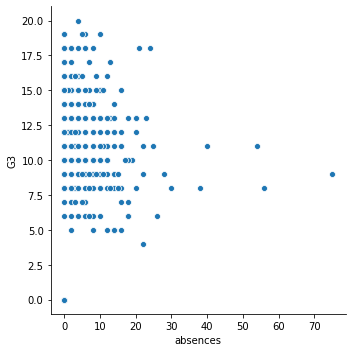

In [3]:
# Change to use relplot() instead of scatterplot()
sns.relplot(x="absences", y="G3", data=student_data, kind='scatter');

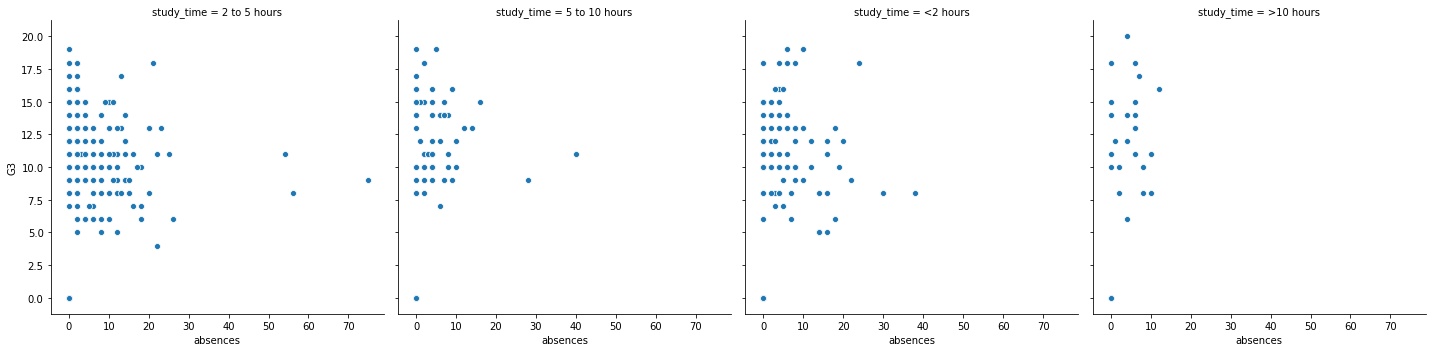

In [4]:
# Change to make subplots based on study time
sns.relplot(x="absences", y="G3", 
            data=student_data,
            kind="scatter",
            col='study_time');

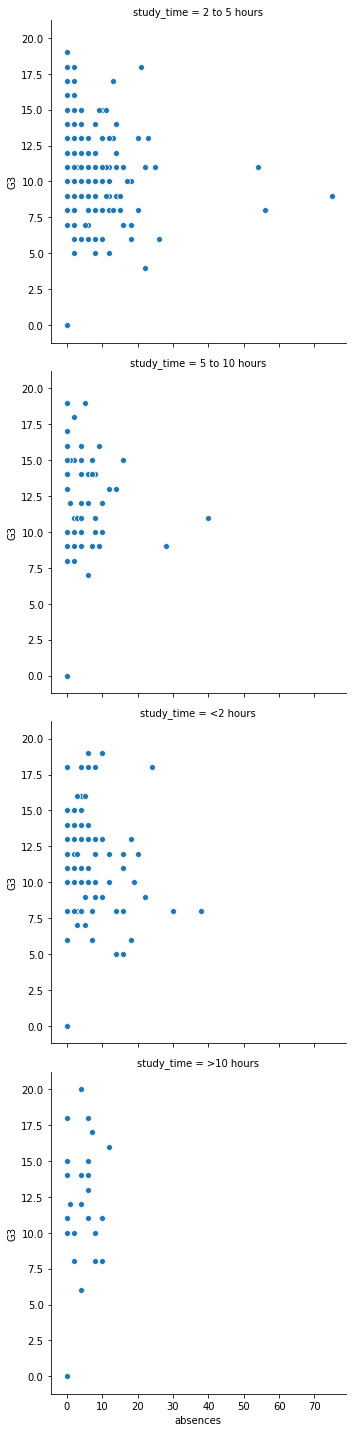

In [5]:
# Change this scatter plot to arrange the plots in rows instead of columns
sns.relplot(x="absences", y="G3", 
            data=student_data,
            kind="scatter", 
            row="study_time");

Because these subplots had a large range of x values, it's easier to read them arranged in rows instead of columns.

### Creating two-factor subplots
Let's continue looking at the student_data dataset of students in secondary school. Here, we want to answer the following question: does a student's first semester grade (`"G1"`) tend to correlate with their final grade (`"G3"`)?

There are many aspects of a student's life that could result in a higher or lower final grade in the class. For example, some students receive extra educational support from their school (`"schoolsup"`) or from their family (`"famsup"`), which could result in higher grades. Let's try to control for these two factors by creating subplots based on whether the student received extra educational support from their school or family.

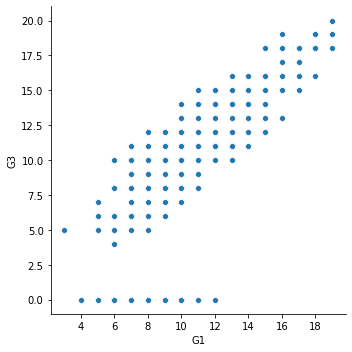

In [6]:
# Create a scatter plot of G1 vs. G3
sns.relplot(x='G1', y='G3', data=student_data, kind='scatter');

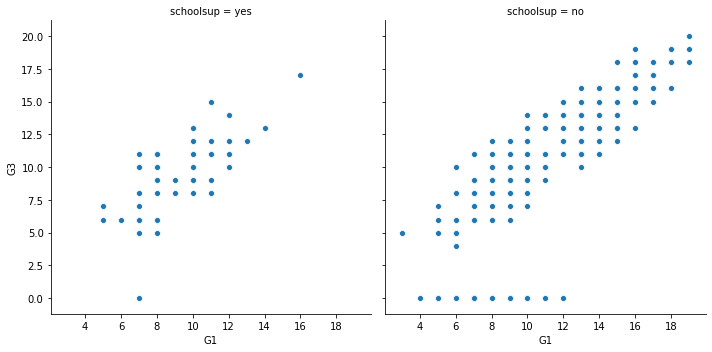

In [7]:
# Adjust to add subplots based on school support
sns.relplot(x="G1", y="G3", data=student_data, kind="scatter", col='schoolsup', col_order=['yes', 'no']);

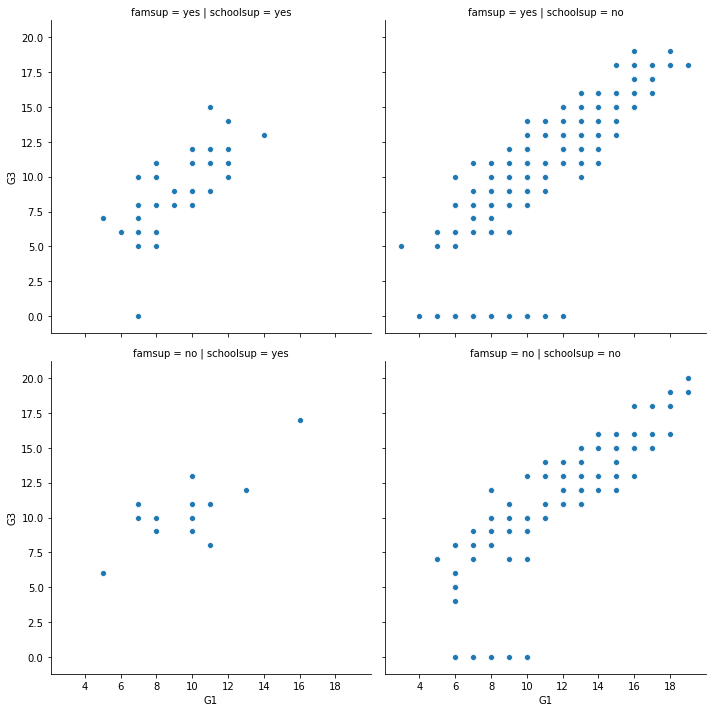

In [8]:
# Adjust further to add subplots based on family support
sns.relplot(x="G1", y="G3", 
            data=student_data,
            kind="scatter", 
            col="schoolsup",
            row='famsup',
            col_order=["yes", "no"],
            row_order=['yes', 'no']);

 It looks like the first semester grade does correlate with the final grade, regardless of what kind of support the student received.

## Customizing scatter plots


### Changing the size of scatter plot points
In this exercise, we'll explore Seaborn's `mpg` dataset, which contains one row per car model and includes information such as the year the car was made, the number of miles per gallon ("M.P.G.") it achieves, the power of its engine (measured in "horsepower"), and its country of origin.

What is the relationship between the power of a car's engine (`"horsepower"`) and its fuel efficiency (`"mpg"`)? And how does this relationship vary by the number of cylinders (`"cylinders"`) the car has? Let's find out.

Let's continue to use `relplot()` instead of `scatterplot()` since it offers more flexibility.

In [9]:
mpg = pd.read_csv('./dataset/mpg.csv')
mpg.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

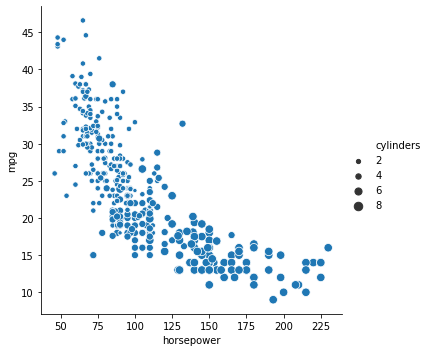

In [10]:
# Create scatter plot of horsepower vs. mpg
sns.relplot(x='horsepower', y='mpg', data=mpg, size='cylinders', kind='scatter');

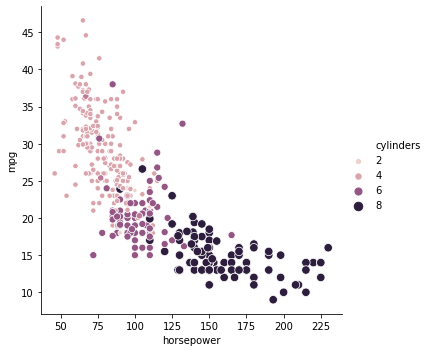

In [11]:
# Create scatter plot of horsepower vs. mpg
sns.relplot(x="horsepower", y="mpg", 
            data=mpg, kind="scatter", 
            size="cylinders",
            hue='cylinders');

Cars with higher horsepower tend to get a lower number of miles per gallon. They also tend to have a higher number of cylinders.

### Changing the style of scatter plot points
Let's continue exploring Seaborn's `mpg` dataset by looking at the relationship between how fast a car can accelerate (`"acceleration"`) and its fuel efficiency (`"mpg"`). Do these properties vary by country of origin (`"origin"`)?

Note that the "acceleration" variable is the time to accelerate from 0 to 60 miles per hour, in seconds. Higher values indicate slower acceleration.

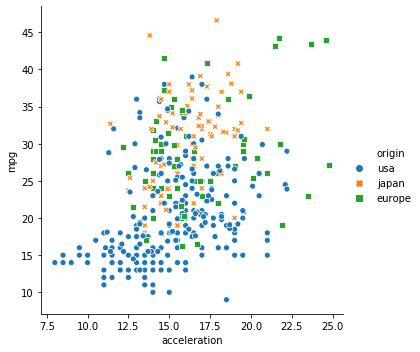

In [12]:
# Create a scatter plot of acceleration vs. mpg
sns.relplot(x='acceleration', y='mpg', data=mpg, kind='scatter', style='origin', hue='origin');

Cars from the USA tend to accelerate more quickly and get lower miles per gallon compared to cars from Europe and Japan.

## Introduction to line plots
- What are line plots?\
Two types of relational plots: scatter plots and line plots
    - Scatter plots
    Each plot point is an independent observation
    - Line plots
    Each plot point represents the same "thing", typically tracked over time.
- Multiple observations per x-value\
Shared region is the confidence interval
    - Assume dataset is random sample
    - 95% confident that the mean is within this interval
    - Indicates uncertainty in our estimate

### Interpreting line plots
In this exercise, we'll continue to explore Seaborn's mpg dataset, which contains one row per car model and includes information such as the year the car was made, its fuel efficiency (measured in "miles per gallon" or "M.P.G"), and its country of origin (USA, Europe, or Japan).

How has the average miles per gallon achieved by these cars changed over time? Let's use line plots to find out!

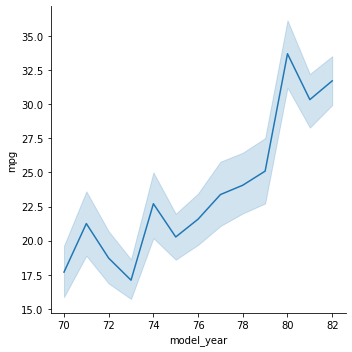

In [13]:
# Create line plot
sns.relplot(x='model_year', y='mpg', data=mpg, kind='line');

### Visualizing standard deviation with line plots
In the last exercise, we looked at how the average miles per gallon achieved by cars has changed over time. Now let's use a line plot to visualize how the distribution of miles per gallon has changed over time.

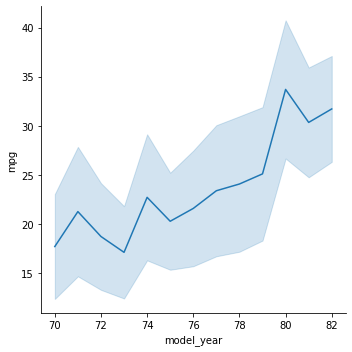

In [14]:
# Make the shaded area show the standard deviation
sns.relplot(x="model_year", y="mpg", data=mpg, kind="line", ci='sd');

Unlike the plot in the last exercise, this plot shows us the distribution of miles per gallon for all the cars in each year.

### Plotting subgroups in line plots
Let's continue to look at the mpg dataset. We've seen that the average miles per gallon for cars has increased over time, but how has the average horsepower for cars changed over time? And does this trend differ by country of origin?

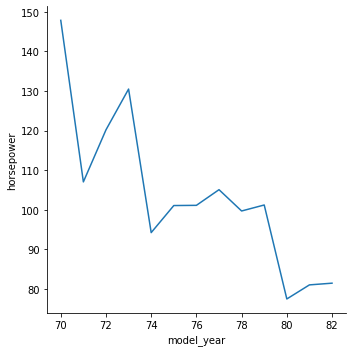

In [15]:
# Create line plot of model year vs. horsepower
sns.relplot(x='model_year', y='horsepower', data=mpg, kind='line', ci=None);

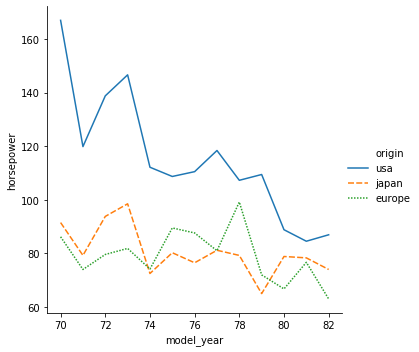

In [16]:
# Change to create subgroups for country of origin
sns.relplot(x="model_year", y="horsepower", data=mpg, kind="line", style='origin', hue='origin',
            ci=None);

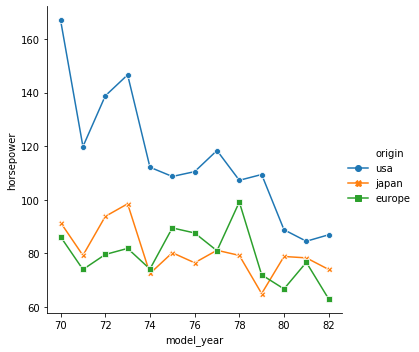

In [18]:
# Add markers and make each line have the same style
sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line", ci=None, style="origin", hue="origin",
            markers=True, dashes=False);

Now that we've added subgroups, we can see that this downward trend in horsepower was more pronounced among cars from the USA.